In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#df = pd.read_csv("Weather_1948-2017.csv")
url="https://raw.githubusercontent.com/ShilpaSayuraML/DS-ML-Workshop/main/Extra/Weather_1948-2017.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB
None


In [7]:
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


## Summery statistics

In [8]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


## Data Distribution

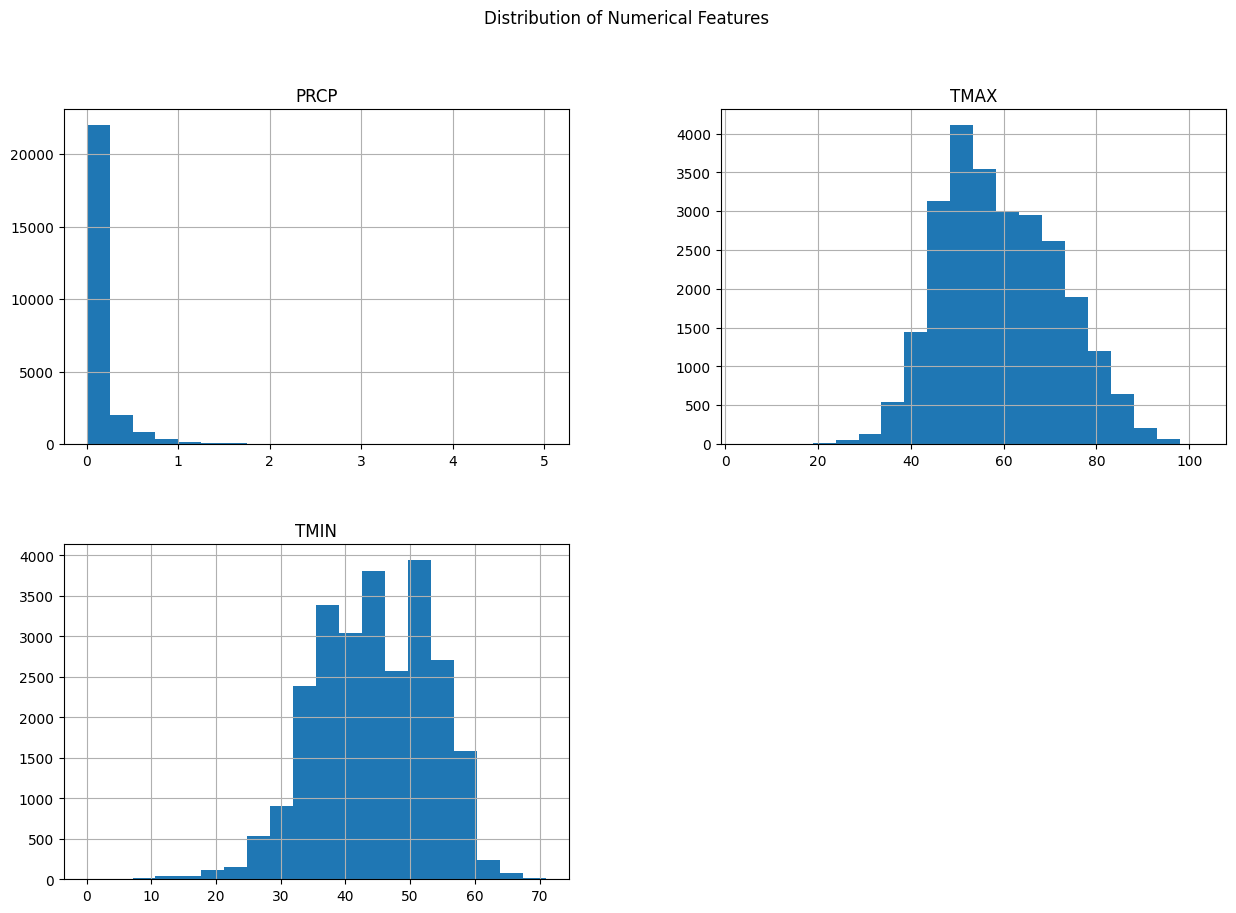

In [9]:
# Visualize the distribution of numerical features
num_features = df.select_dtypes(include=["float64", "int64"]).columns
df[num_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

## Visualize relationship between features

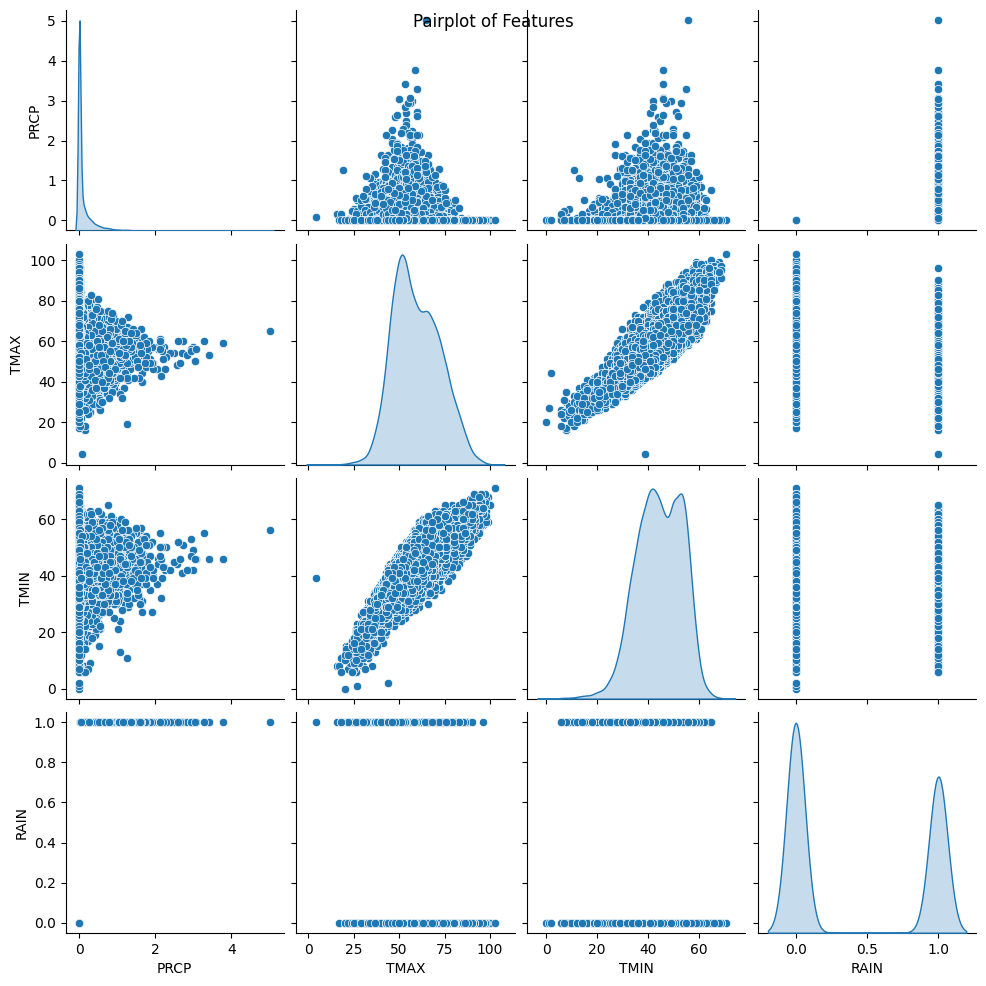

In [10]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Features")
plt.show()

## Correlation matrix

<ipython-input-11-c47e933cac69>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


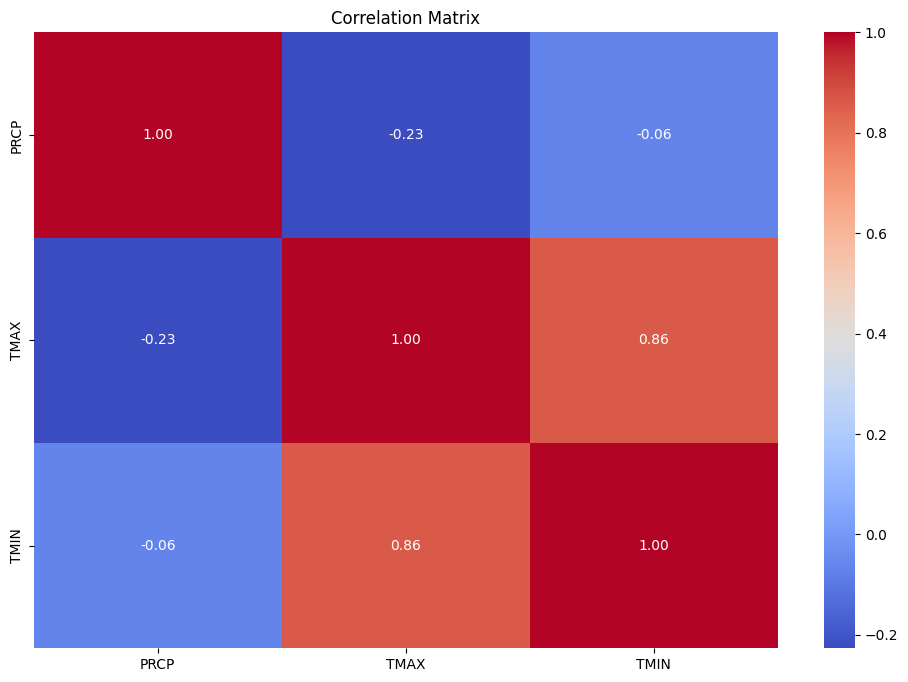

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

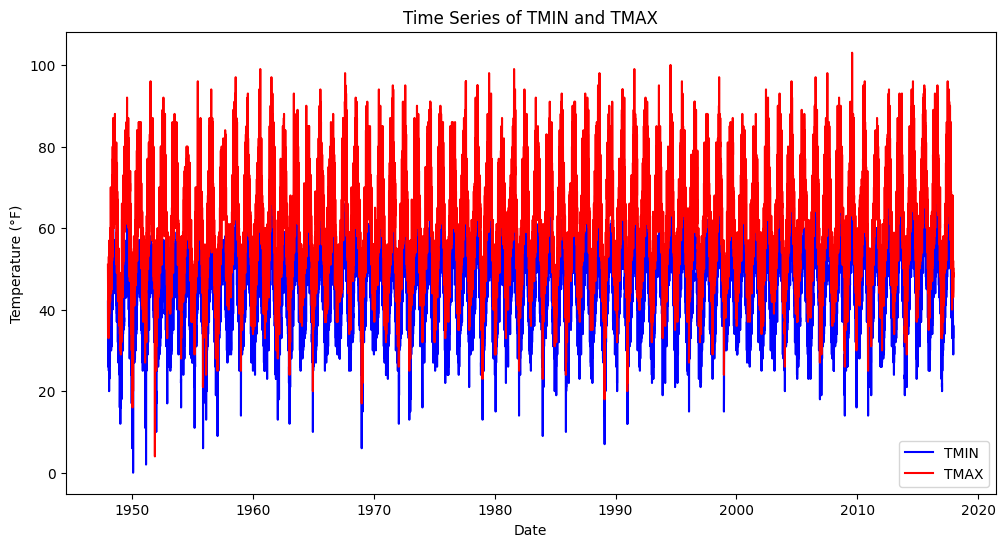

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Set the 'DATE' column as the index
df.set_index('DATE', inplace=True)

# Plot time series data for TMIN, TMAX, and PRCP
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TMIN'], label='TMIN', color='blue')
plt.plot(df.index, df['TMAX'], label='TMAX', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Time Series of TMIN and TMAX')
plt.legend()
plt.show()

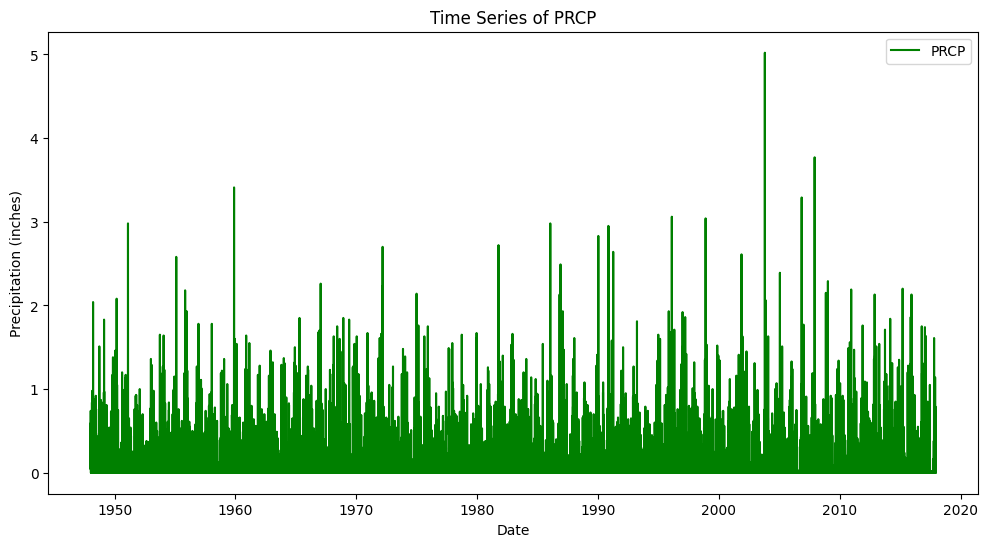

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PRCP'], label='PRCP', color='green')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Time Series of PRCP')
plt.legend()
plt.show()

## Rain classification using logistics regression

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
#df = pd.read_csv("Weather_1948-2017.csv")
# Drop rows with missing values
df.dropna(inplace=True)

# Convert 'RAIN' column to binary labels (0 for 'FALSE', 1 for 'TRUE')
label_encoder = LabelEncoder()
df['RAIN'] = label_encoder.fit_transform(df['RAIN'])

# Prepare features and target variable
X = df[['TMIN', 'TMAX', 'PRCP']]
y = df['RAIN']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9297455968688846

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2953
           1       1.00      0.84      0.91      2157

    accuracy                           0.93      5110
   macro avg       0.94      0.92      0.93      5110
weighted avg       0.94      0.93      0.93      5110


Confusion Matrix:
[[2944    9]
 [ 350 1807]]


## Inference

In [29]:
# Function to make inference given TMIN, TMAX, PRCP values
def make_inference(tmin, tmax, prcp):
    # Create a DataFrame with the provided values
    new_data = pd.DataFrame({'TMIN': [tmin], 'TMAX': [tmax], 'PRCP': [prcp]})
    # Use the trained model to predict the rain classification
    prediction = model.predict(new_data)
    # Return the prediction
    return prediction[0]

# Example inference
tmin = 50
tmax = 70
prcp = 0.5
inference_result = make_inference(tmin, tmax, prcp)
print("Inference result RAIN :", "TRUE" if inference_result == 1 else "FALSE")


Inference result RAIN : TRUE


In [27]:
import pandas as pd

# Assuming df is already loaded and processed

# Select records where RAIN is FALSE and prc > 0
filtered_df = df[(df['RAIN'] == 0) & (df['PRCP'] == 0.0)]

# Display the selected records
filtered_df


,PRCP,TMAX,TMIN,RAIN
DATE,,,,
1948-01-12,0.0,41,26,0
1948-01-13,0.0,45,29,0
1948-01-14,0.0,38,26,0
1948-01-15,0.0,34,31,0
1948-01-16,0.0,34,28,0
...,...,...,...,...
2017-12-10,0.0,49,34,0
2017-12-11,0.0,49,29,0
2017-12-12,0.0,46,32,0
